In [221]:
#Лабораторна робота 2
#Аналіз даних. Бібліотека Pandas
#Завдання 1
#Зчитати датасет ВВП (млн. дол. США) за країнами з Вікіпедії, провести попередній аналіз даних

import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)
df = tables[2]

# 1. Вивести перших 5 рядків.
df.head()

Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

In [222]:
# 2. Визначити розмір датасета.
print("Розмір датасета: ")
df.shape

Розмір датасета: 


(210, 7)

In [223]:
# 3. Визначити оптимальну кількість стовпців
# 4. Змінити назви стовпців на більш зручні, наприклад

new_columns = [
    'Country',
    'IMF_Forecast',
    'IMF_Year',
    'WorldBank_Estimate',
    'WorldBank_Year',
    'UN_Estimate',
    'UN_Year'
]
df.columns = new_columns

selected_columns = {
    'IMF_Forecast': 'MVF_2024',
    'WorldBank_Estimate': 'WorldBank_2023',
    'UN_Estimate': 'OON_2022'
}

df1 = df[['Country'] + list(selected_columns.keys())]
df = df1.rename(columns=selected_columns)

df.head()

,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216,105435540,100834796
1,United States,28781083,27360935,25744100
2,China,18532633,17794782,17963170
3,Germany,4591100,4456081,4076923
4,Japan,4110452,4212945,4232173


In [224]:
# 5. Визначити тип даних.

print("Типи даних датасету: ")
df.dtypes

Типи даних датасету: 


,0
Country,object
MVF_2024,object
WorldBank_2023,object
OON_2022,object


In [225]:
# 6. Замініть у таблиці значення "—" на значення NaN. Перевірити
#наявність пропущених значень. При наявності, замінити пропущені
#значення на середнє значення.

#Заміна у таблиці значень "—" на значення NaN.
df.replace('—', float('NaN'), inplace=True)

#Перевірка наявності пропущених значень.
df.isnull().sum()

#Заміна пропущені значення у таблиці на середнє значення стовпців.
df =  df.drop([0], axis=0)
df = df.fillna(df.mean(numeric_only=True))

df.head(5)

,Country,MVF_2024,WorldBank_2023,OON_2022
1,United States,28781083,27360935,25744100
2,China,18532633,17794782,17963170
3,Germany,4591100,4456081,4076923
4,Japan,4110452,4212945,4232173
5,India,3937011,3549919,3465541


In [226]:
# 7. Ще раз перевірити наявність пропущених значень.

df.isnull().sum()

,0
Country,0
MVF_2024,15
WorldBank_2023,8
OON_2022,1


In [227]:
# 8. Перевірити наявність дублікатів. При наявності видалити дублікати.

#Перевірка наявності дуплікатів.
df.duplicated()

#Видалення дублікатів при наявності.
df.drop_duplicates()

,Country,MVF_2024,WorldBank_2023,OON_2022
1,United States,28781083,27360935,25744100
2,China,18532633,17794782,17963170
3,Germany,4591100,4456081,4076923
4,Japan,4110452,4212945,4232173
5,India,3937011,3549919,3465541
...,...,...,...,...
205,Kiribati,311,279,223
206,Palau,308,263,225
207,Marshall Islands,305,284,279
208,Nauru,161,154,147


In [228]:
#9. Вивести описову статистику датасету describe()

df.describe()

,Country,MVF_2024,WorldBank_2023,OON_2022
count,209,194,201,208
unique,209,194,201,208
top,United States,28781083,27360935,25744100
freq,1,1,1,1


In [229]:
#10.Визначте відхилення (різницю) між показниками MVF_2024 та
#WorldBank_2023 для кожної країни. У яких країнах ці показники
#найбільше відрізняються (дати відповідь)?

df1 = pd.DataFrame(df,columns= ['Country'])

#Необхідна конвертація даних датафрейму зі string до int
df1['MVF/WorldBank Difference'] = pd.to_numeric(df['MVF_2024']) - pd.to_numeric(df['WorldBank_2023'])

#Сортування df1 за спаданням різниці показників
df1 = df1.sort_values('MVF/WorldBank Difference', ascending=False)

df1.head(5)
#Найбільше відрізняються показники у США, Китаю, Індії, Мексики та Бразилії

,Country,MVF/WorldBank Difference
1,United States,1420148.0
2,China,737851.0
5,India,387092.0
12,Mexico,228138.0
8,Brazil,157725.0


In [230]:
#11. Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та
#OON_2022. Які пари змінних мають найвищу кореляцію?

df1 = pd.DataFrame(df,columns= ['MVF_2024', 'WorldBank_2023', 'OON_2022'])
df1.corr()
#Найбільшу кореляцію має пара MVF_2024/WorldBank_2023

,MVF_2024,WorldBank_2023,OON_2022
MVF_2024,1.000000,0.999899,0.998964
WorldBank_2023,0.999899,1.000000,0.999285
OON_2022,0.998964,0.999285,1.000000


In [231]:
#12.Обчисліть середнє значення для кожного стовпця (MVF_2024,
#WorldBank_2023, OON_2022). Як це середнє значення змінюється між роками?

df1 = pd.DataFrame(df,columns= ['MVF_2024', 'WorldBank_2023', 'OON_2022'])
df1['MVF_2024'] = pd.to_numeric(df1['MVF_2024'], errors='coerce')
df1['WorldBank_2023'] = pd.to_numeric(df1['WorldBank_2023'], errors='coerce')
df1['OON_2022'] = pd.to_numeric(df1['OON_2022'], errors='coerce')

print('З кожним роком середнє значення збільшується')
df1.mean()

З кожним роком середнє значення збільшується


,0
MVF_2024,564433.932990
WorldBank_2023,517811.472637
OON_2022,481108.673077


In [232]:
#13.Обчисліть стандартне відхилення показників для кожної країни. Яка
#країна має найвищу варіативність у показниках між роками?

#Транспонування таблиці
df1 = pd.DataFrame(df)
df1 = df.transpose(copy = True)

#Заміна назв стовпців на назви країн
df1.columns = df1.iloc[0]
df1 = df1[1:]

#Конвертація стовпців до float
df1 = df1.apply(pd.to_numeric)

#Пошук стандартного відхилення
df1 = df1.std()

#Сортування df1 за спаданням стандартного відхилення
print('США має найвищу варіативність у показниках між роками')
df1.nlargest()

США має найвищу варіативність у показниках між роками


,0
Country,
United States,1.519553e+06
China,3.866667e+05
Mexico,2.782759e+05
Germany,2.665736e+05
India,2.514106e+05


In [233]:
# 14.Визначення країни з найвищим та найнижчим показниками: Знайдіть
#країну з найвищим та найнижчим показниками у кожному з років
#(MVF_2024, WorldBank_2023, OON_2022).

df['MVF_2024'] = pd.to_numeric(df['MVF_2024'], errors='coerce')
df['WorldBank_2023'] = pd.to_numeric(df['WorldBank_2023'], errors='coerce')
df['OON_2022'] = pd.to_numeric(df['OON_2022'], errors='coerce')

df.head()
df.max(numeric_only=True)

,0
MVF_2024,28781083.0
WorldBank_2023,27360935.0
OON_2022,25744100.0


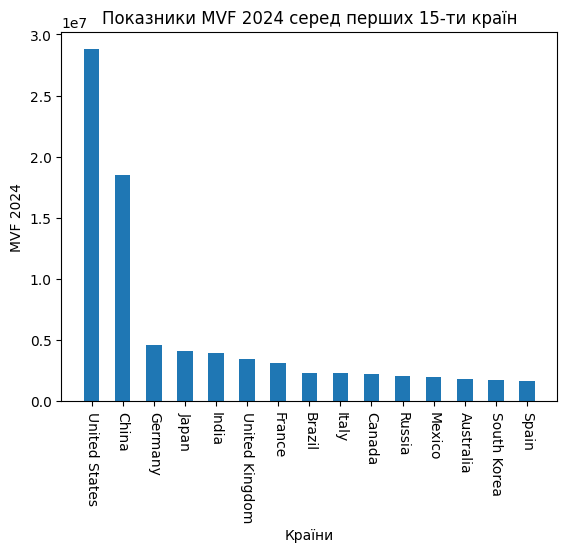

США та Китай виділяються найбільшими значеннями на гістограмі


In [234]:
# 15. Побудуйте гістограму для розподілу показників MVF_2024 серед всіх
#країн. Який вигляд має розподіл? Чи є країни, що виділяються?
import matplotlib.pyplot as plt

plt.bar(df['Country'][:15], df['MVF_2024'][:15], align='center', width=0.5)
plt.xlabel('Країни')
plt.ylabel('MVF 2024')
plt.xticks(rotation=-90)
plt.title('Показники MVF 2024 серед перших 15-ти країн')

plt.show()

print('США та Китай виділяються найбільшими значеннями на гістограмі')

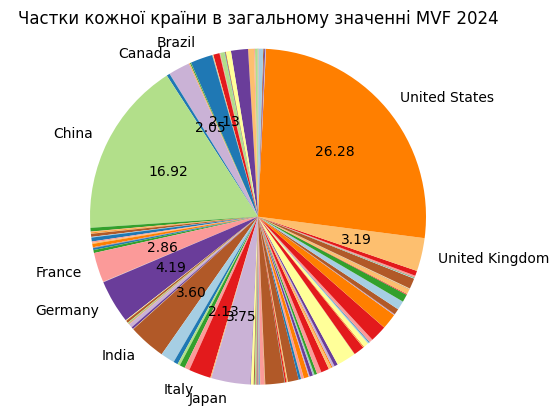

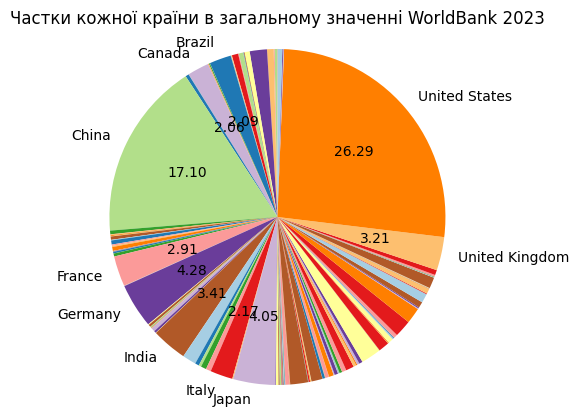

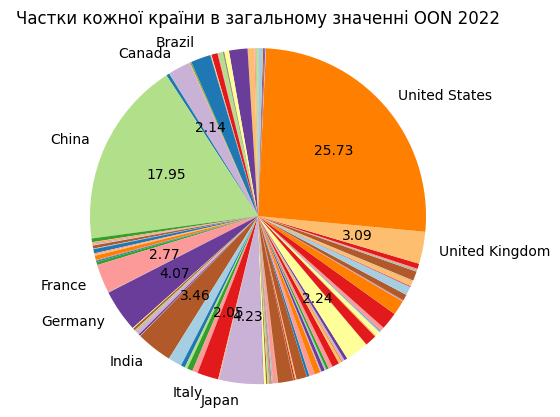


У більшості країн у 2023 році показники ВВП збільшились, але у 2024 показники або зменшились, або залишились на попередньому рівні


In [235]:
# 16. Розрахуйте частку кожної країни в загальному значенні для кожного
# року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки
# країн з часом (дати відповідь)?

#Візуалізувати частки кожної країни найпростіше за допомогою кругової діаграми

#Функція для для приховування назв країн, частка яких менше за 2%, для зручності перегляду
def autopct_greater2(pct):
    return ('%.2f' % pct) if pct > 2 else ''

#Кругова діаграма MVF_2024
MVF_sum = df.groupby('Country')['MVF_2024'].sum()

plt.pie(MVF_sum, labels=labels, autopct=autopct_greater2, startangle=90, colors=plt.cm.Paired.colors)
plt.title('Частки кожної країни в загальному значенні MVF 2024')
plt.axis('equal')

plt.show()

#Кругова діаграма WorldBank_2023
WorldBank_sum = df.groupby('Country')['WorldBank_2023'].sum()

plt.pie(WorldBank_sum, labels=labels, autopct=autopct_greater2, startangle=90, colors=plt.cm.Paired.colors)
plt.title('Частки кожної країни в загальному значенні WorldBank 2023')
plt.axis('equal')

plt.show()

#Кругова діаграма OON_2022
OON_sum = df.groupby('Country')['OON_2022'].sum()

plt.pie(OON_sum, labels=labels, autopct=autopct_greater2, startangle=90, colors=plt.cm.Paired.colors)
plt.title('Частки кожної країни в загальному значенні OON 2022')
plt.axis('equal')

plt.show()

print()
print('У більшості країн у 2023 році показники ВВП збільшились, але у 2024 показники або зменшились, або залишились на попередньому рівні')

Більшість країн мають стабільне значення, що не змінюється з роками.
США, Китай та Німеччина показують стабільне зростання


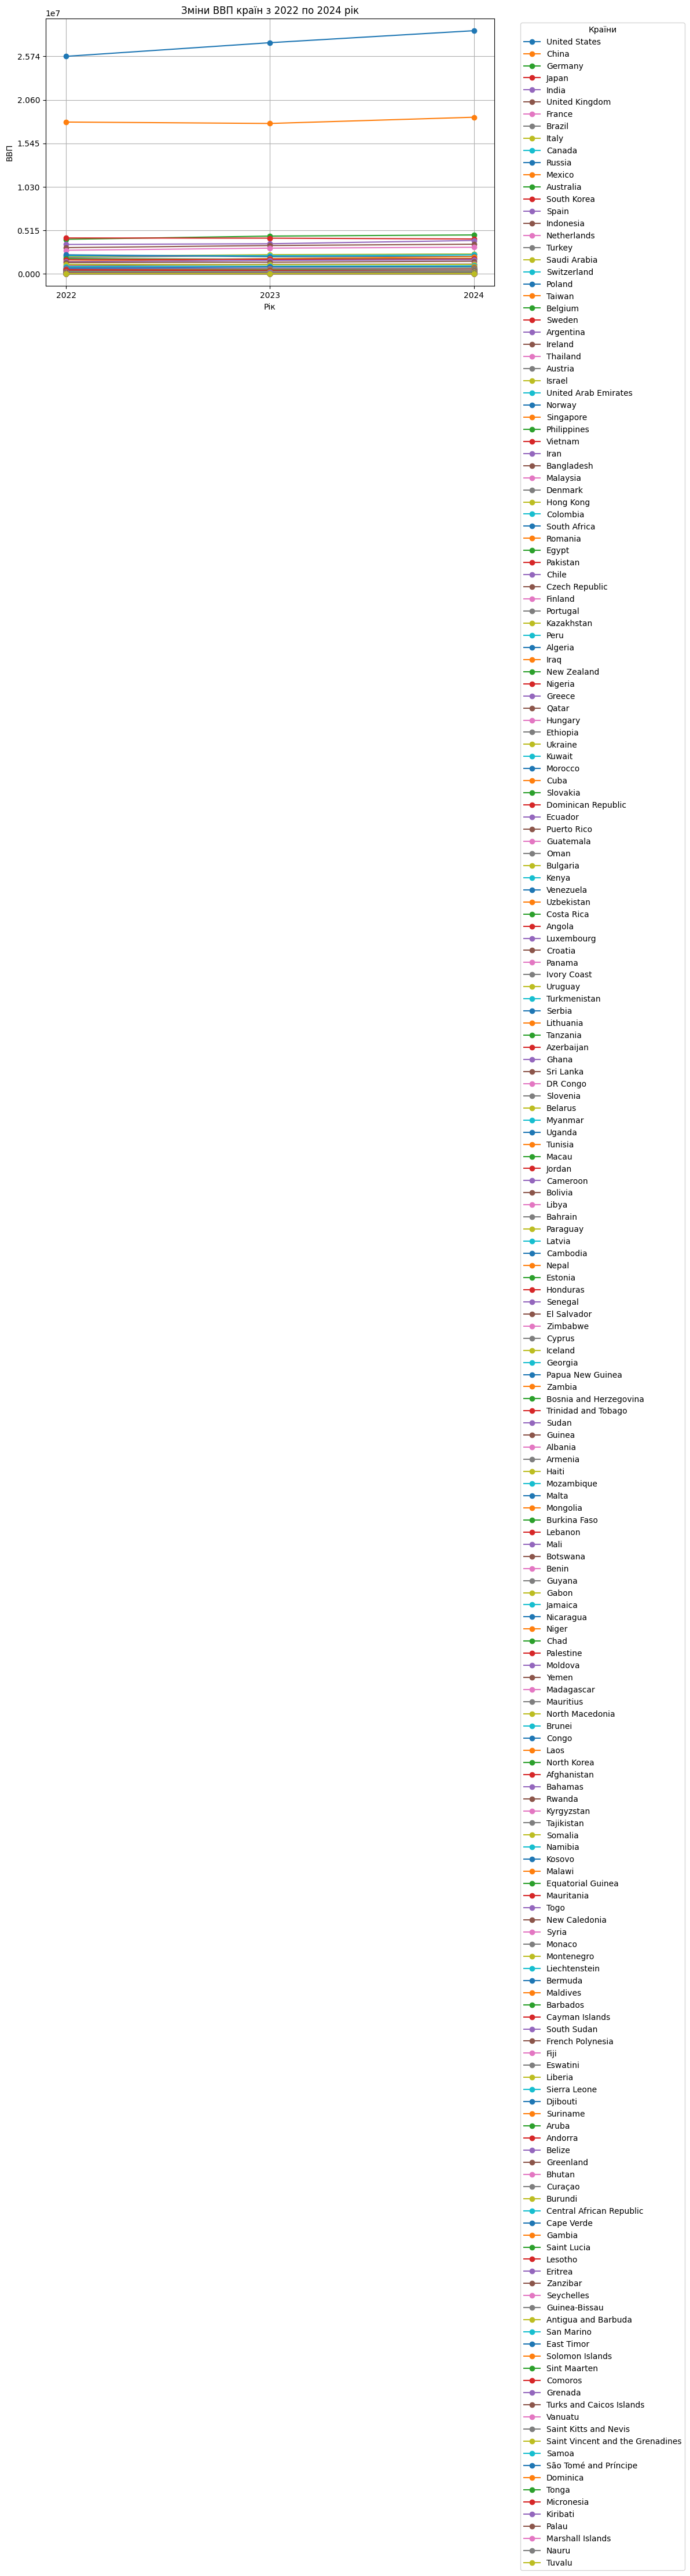

In [236]:
# 17. .Візуалізуйте зміни в показниках для кожної країни за три роки на
# графіку. Які країни показують стабільне зростання або спад (дати
# відповідь)?

years = [2022, 2023, 2024]

y_min = int(min(df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].min()))
y_max = int(min(df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].max()))

plt.figure(figsize=(10, 6))

for index, row in df.iterrows():
    gdp_values = [row['OON_2022'], row['WorldBank_2023'], row['MVF_2024']]

    plt.plot(years, gdp_values, marker='o', label=row['Country'])
    plt.xticks(years)
    plt.yticks(range(int(y_min), int(y_max), max(1, (y_max - y_min) // 5)))

plt.title('Зміни ВВП країн з 2022 по 2024 рік')
plt.xlabel('Рік')
plt.ylabel('ВВП')

plt.legend(title='Країни', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

print("Більшість країн мають стабільне значення, що не змінюється з роками.")
print("США, Китай та Німеччина показують стабільне зростання")
plt.show()

Висновок

У даній лабораторній роботі було проведено аналіз показників валового внутрішнього продукту (ВВП)
країн за 2022, 2023 та 2024 роки за допомогою датафрейму.
Основною метою роботи було навчитись працювати з бібліотеками pandas та matplotlib.
Була проведена робота з основними функціями ціх бібліотек для створення датафреймів, керування, сортування,
проведення обчислень та побудови графіків на його основі.
Результати роботи були завантажені на відповідний Github-репозиторій.

In [237]:
# Завдання 2
# Завантажити датасет Титанік з Kaggle (або використовуйте вже завантажений файл titanic.csv)
# Виконати попередній аналіз даних.

import time
import random
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/titanic.csv'

df = pd.read_csv(file_path)

# 1. Вивести перших 5 рядків.
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [238]:
# 2. Визначити розмір датасета.

print('Розмір датасета:')
df.shape

Розмір датасета:


(418, 12)

In [239]:
# 3. Визначити тип даних.

print("Типи даних датасету: ")
df.dtypes

Типи даних датасету: 


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [240]:
# 4. Визначити наявність пропущених значень. При наявності, замінити
# пропущені значення на середнє значення.

#Перевірка наявності пропущених значень.
df.isnull().sum()

#Заміна пропущені значення у таблиці на середнє значення стовпців.
df =  df.drop([0], axis=0)
df = df.fillna(df.mean(numeric_only=True))

df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


In [241]:
# 5. Ще раз перевірити наявність пропущених значень.

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [242]:
# 6. Перевірити наявність дублікатів. При наявності видалити дублікати.

#Перевірка наявності дуплікатів.
df.duplicated()

#Видалення дублікатів при наявності.
df.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.000000,0,0,7538,9.2250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.259819,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.259819,0,0,359309,8.0500,NaN,S


In [243]:
# 7. Вивести описову статистику датасету describe()

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,1101.000000,0.364508,2.263789,30.259819,0.448441,0.393285,35.694011
std,120.521782,0.481870,0.842077,12.648008,0.897568,0.982419,55.890921
min,893.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,997.000000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1101.000000,0.000000,3.000000,30.259819,0.000000,0.000000,14.454200
75%,1205.000000,1.000000,3.000000,36.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [244]:
# 8. Видалити стовпчик Cabin

df.drop('Cabin', axis=1, inplace=True)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S


In [245]:
# 9. Сформувати датасет з обраними стовпцями:
# ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

df = df[['Survived', 'Pclass', 'Sex', 'Age','Fare']]

df.head()

,Survived,Pclass,Sex,Age,Fare
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875
5,0,3,male,14.0,9.2250


In [246]:
# 10. Замінити бінарні ознаки (Стать) на 0 і 1 (але перевірте унікальні
# значення даного стовпчика).

print(df['Sex'].unique())

df['Sex'] = df['Sex'].replace({'female': 1, 'male': 0}).astype(int)

df.head()

['female' 'male']


<ipython-input-246-676efa7534e0>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'female': 1, 'male': 0}).astype(int)
<ipython-input-246-676efa7534e0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].replace({'female': 1, 'male': 0}).astype(int)


,Survived,Pclass,Sex,Age,Fare
1,1,3,1,47.0,7.0000
2,0,2,0,62.0,9.6875
3,0,3,0,27.0,8.6625
4,1,3,1,22.0,12.2875
5,0,3,0,14.0,9.2250


In [247]:
# 11. Ще раз перевірити кількість пропущених даних (впевнитись, що їх
# немає).

df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0


In [248]:
# 12. Вивести 5 перших рядків датасету.

df.head()

,Survived,Pclass,Sex,Age,Fare
1,1,3,1,47.0,7.0000
2,0,2,0,62.0,9.6875
3,0,3,0,27.0,8.6625
4,1,3,1,22.0,12.2875
5,0,3,0,14.0,9.2250


In [249]:
# 13. Вивести 5 останніх рядків датасету.

df.tail()

,Survived,Pclass,Sex,Age,Fare
413,0,3,0,30.259819,8.0500
414,1,1,1,39.000000,108.9000
415,0,3,0,38.500000,7.2500
416,0,3,0,30.259819,8.0500
417,0,3,0,30.259819,22.3583


In [253]:
# 14. Аналіз виживання залежно від статі: Обчисліть відсоток виживання
# для кожної статі. Чи була різниця у виживанні між чоловіками та
# жінками?

survival_rate = df.groupby('Sex')['Survived'].mean() * 100

print(survival_rate)
print('')
print('Згідно з датафреймом, всі чоловіки загинули, тоді як всі жінки вижили')

Sex
0      0.0
1    100.0
Name: Survived, dtype: float64

Згідно з датафреймом, всі чоловіки загинули, тоді як всі жінки вижили


In [255]:
# 15. Обчисліть відсоток виживання для кожного класу (Pclass). Який
# клас мав найвищий рівень виживання (дати відповідь)?

survival_rate = df.groupby('Pclass')['Survived'].mean() * 100

print(survival_rate)
print('')
print('Згідно з датафреймом, найвищий рівень виживання мав класс 1')

Pclass
1    46.728972
2    32.258065
3    33.179724
Name: Survived, dtype: float64

Згідно з датафреймом, найвищий рівень виживання мав класс 1


In [257]:
# 16. Визначте середній вік тих, хто вижив, і тих, хто не вижив. Чи
# впливає вік на виживання (дати відповідь)?

average_age = df.groupby('Survived')['Age'].mean()

# Друк результату
print(average_age)
print('')
print('Згідно з датафреймом, середні значення мають дуже малу різницю, тому вік на виживання не впливає')

Survived
0    30.253807
1    30.270299
Name: Age, dtype: float64

Згідно з датафреймом, середні значення мають дуже малу різницю, тому вік на виживання не впливає


In [266]:
# 17. Розподіліть пасажирів на групи за рівнями тарифів (Fare) і
# обчисліть рівень виживання для кожної групи. Як тариф впливав на
# шанси виживання (дати відповідь)?

fare_bins = [0, 20, 40, 80, 110, 170, 520]
fare_labels = ['1-20', '20-40', '40-80', '80-110', '110-170', '170-520']

df['FareGroup'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels)
survival_rate = df.groupby('FareGroup')['Survived'].mean() * 100

print(survival_rate)
print('')
print('Згідно з датафреймом, вищий тариф позитивно впливає на шанси виживання, за виключенням тарифу 110-170')

df.drop('FareGroup', axis=1, inplace=True)

FareGroup
1-20       29.059829
20-40      41.935484
40-80      44.680851
80-110     58.333333
110-170    45.454545
170-520    66.666667
Name: Survived, dtype: float64

Згідно з датафреймом, вищий тариф позитивно впливає на шанси виживання, за виключенням тарифу 110-170


<ipython-input-266-96638e842aed>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = df.groupby('FareGroup')['Survived'].mean() * 100


In [268]:
# 18. Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного
# класу (Pclass). Чи існує значна різниця у тарифах між класами (дати
# відповідь)?

average_fare = df.groupby('Pclass')['Fare'].mean()

print(average_fare)
print('')
print('Згідно з датафреймом, класи 2 і 3 мають значну різницю у середньому тарифі з класом 1.')

Pclass
1    94.280297
2    22.202104
3    12.588087
Name: Fare, dtype: float64

Згідно з датафреймом, класи 2 і 3 мають значну різницю у середньому тарифі з класом 1.


In [272]:
# 19. Обчисліть середній вік пасажирів для кожного класу (Pclass). Як вік
# пасажирів розподіляється за класами (дати відповідь)?

average_age = df.groupby('Pclass')['Age'].mean()

print(average_age)
print('')
print('Згідно з датафреймом, у класах 2 і 3 більше росподілені молоді люди, тоді як у класі 1 росподілені люди віком ближче до 40 років')

Pclass
1    40.021854
2    28.857195
3    26.047405
Name: Age, dtype: float64

Згідно з датафреймом, у класах 2 і 3 більше росподілені молоді люди, тоді як у класі 1 росподілені люди віком ближче до 40 років


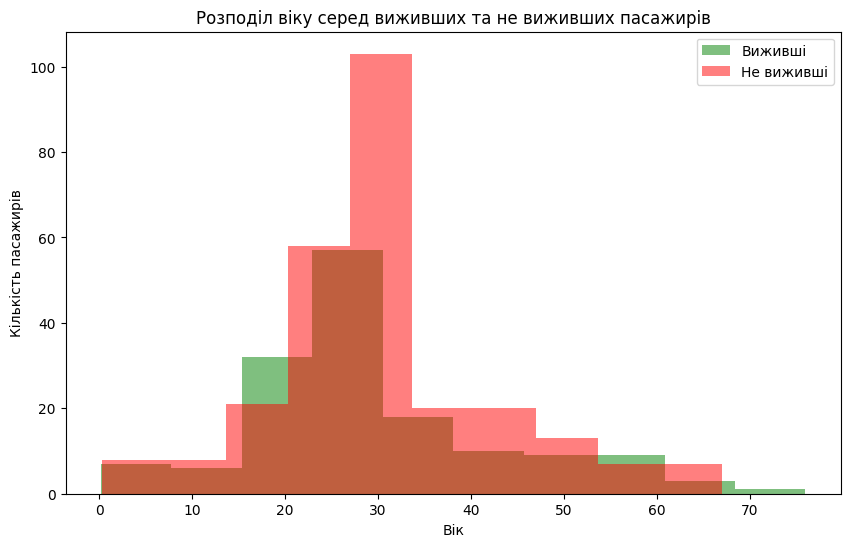


Найбільше всього виживших у віковій категорії 25-35, але ця категорія має найбільшу різницю з кількістью загиблих, що перевищує майже в 2 рази.
До того ж, віковій категорії 15-20 та 55-60 - єдині, що мають більше виживших, ніж загиблих, а категорія 70+ не має загиблих взагалі.


In [278]:
# 20. Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто
# не вижив. Чи є видимі відмінності у вікових групах (дати
# відповідь)?

survived = df[df['Survived'] == 1]['Age']
not_survived = df[df['Survived'] == 0]['Age']

plt.figure(figsize=(10,6))

plt.hist(survived, bins=10, alpha=0.5, label='Виживші', color='green')
plt.hist(not_survived, bins=10, alpha=0.5, label='Не виживші', color='red')

plt.title('Розподіл віку cеред виживших та не виживших пасажирів')
plt.xlabel('Вік')
plt.ylabel('Кількість пасажирів')
plt.legend()

plt.show()

print('')
print('Найбільше всього виживших у віковій категорії 25-35, але ця категорія має найбільшу різницю з кількістью загиблих, що перевищує майже в 2 рази.')
print('До того ж, віковій категорії 15-20 та 55-60 - єдині, що мають більше виживших, ніж загиблих, а категорія 70+ не має загиблих взагалі.')

In [277]:
# 21. Обчисліть відсоток виживання для кожної комбінації статі та класу
# (наприклад, жінки в 1-му класі, чоловіки в 3-му класі). Яка група
# мала найвищий рівень виживання (дати відповідь)?

survival_rate = df.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100

print(survival_rate)
print('')
print('Згідно з датафреймом, жінки мали найвищий рівень виживання, незалежно від класу.')

Sex  Pclass
0    1           0.0
     2           0.0
     3           0.0
1    1         100.0
     2         100.0
     3         100.0
Name: Survived, dtype: float64


In [280]:
# 21. Обчисліть кореляцію між усіма числовими змінними (Survived,
# Pclass, Age, Fare). Які змінні найбільш сильно корелюють з
# виживанням (дати відповідь)?

correlation_matrix = df[['Survived', 'Pclass', 'Age', 'Fare']].corr()

print(correlation_matrix)
print('')
print('Згідно з датафреймом, найбільшу кореляцію з виживанням мав тариф.')

          Survived    Pclass       Age      Fare
Survived  1.000000 -0.107203  0.000628  0.190664
Pclass   -0.107203  1.000000 -0.442064 -0.576272
Age       0.000628 -0.442064  1.000000  0.327426
Fare      0.190664 -0.576272  0.327426  1.000000

Згідно з датафреймом, найбільшу кореляцію з виживанням мав тариф.


Висновок
У ході виконання лабораторної роботи було проведено детальний аналіз даних, пов'язаних з пасажирами Титаніка, за допомогою інструментів бібліотеки Python Pandas. Проведене дослідження підтвердило наявність істотних зв'язків між класом, статтю пасажирів і їх виживанням, що відповідає історичним даним про катастрофу Титаніка. Було ознайомлено з темою роботи з датафреймами та аналізом даних. Результати роботи були завантажені на відповідний Github-репозиторій.